In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pd.options.display.max_colwidth = 200

# Load test result

In [10]:
df = pd.read_csv('data/model_compare.csv')

In [38]:
display(df.sample(2))

,Unnamed: 0,org_title,cleaned_words,minimal_words,cleaned_pos,y_true,nb_og,nb_og_p0,nb_og_p1,nb_cw,...,fnn_og_p1,fnn_cw,fnn_cw_p0,fnn_cw_p1,fnn_mw,fnn_mw_p0,fnn_mw_p1,fnn_ps,fnn_ps_p0,fnn_ps_p1
3489,3489,THE BRUTAL TRUTH About The Mooching Bum Who Wanted To Be Your Next President…And Tax You To Death,the brutal truth about the mooching bum who wanted to be your next president and tax you to death,brutal truth mooching bum want next president tax death,DT NNP NNP IN DT NNP NNP NNP VBD TO VB PRP$ JJ NNP NNP PRP TO VB,1,1,2.087285e-08,1.000000,1,...,1.000000,1,1.601720e-09,1.000000,1,0.000116,0.999884,1,1.218414e-08,1.000000
2613,2613,"Thousands march in Tel Aviv to protest against Netanyahu, corruption",thousands march in tel aviv to protest against netanyahu corruption,thousand march tel aviv protest netanyahu corruption,NNS VBP IN NNP NNP TO VB IN NNP NN,0,0,9.981030e-01,0.001897,0,...,0.000655,0,9.996358e-01,0.000364,0,0.991811,0.008189,0,9.978920e-01,0.002108


In [49]:
seq_type = ['Original','CleanedWords','PoS','MinimalWords']
ml_type = ['NaiveBayse','FNN','LSTM']
seq_type_abb = ['og','cw','ps','mw']
ml_type_abb = ['nb','fnn','lstm']

X = []
X.append(df.org_title.to_numpy())
X.append(df.cleaned_words.to_numpy())
X.append(df.cleaned_pos.to_numpy())
X.append(df.minimal_words.to_numpy())

y_true = df.y_true.to_numpy()

# y_pred[12 models (4 NB + 4 FNN + 4 LSTM)][m]
y_pred = []
y_pred.append(df.nb_og.to_numpy())
y_pred.append(df.nb_cw.to_numpy())
y_pred.append(df.nb_ps.to_numpy())
y_pred.append(df.nb_mw.to_numpy())
y_pred.append(df.fnn_og.to_numpy())
y_pred.append(df.fnn_cw.to_numpy())
y_pred.append(df.fnn_ps.to_numpy())
y_pred.append(df.fnn_mw.to_numpy())
y_pred.append(df.lstm_og.to_numpy())
y_pred.append(df.lstm_cw.to_numpy())
y_pred.append(df.lstm_ps.to_numpy())
y_pred.append(df.lstm_mw.to_numpy())

fake_prob = []
y_pred.append(df.nb_og_p1.to_numpy())
y_pred.append(df.nb_cw_p1.to_numpy())
y_pred.append(df.nb_ps_p1.to_numpy())
y_pred.append(df.nb_mw_p1.to_numpy())
y_pred.append(df.fnn_og_p1.to_numpy())
y_pred.append(df.fnn_cw_p1.to_numpy())
y_pred.append(df.fnn_ps_p1.to_numpy())
y_pred.append(df.fnn_mw_p1.to_numpy())
y_pred.append(df.lstm_og_p1.to_numpy())
y_pred.append(df.lstm_cw_p1.to_numpy())
y_pred.append(df.lstm_ps_p1.to_numpy())
y_pred.append(df.lstm_mw_p1.to_numpy())

# Score summary

In [17]:
df_entries = []

for i in range(3):
    for j in range(4):
        k = i*4 + j
        #print(ml_type[i],seq_type[j])
        ac = accuracy_score(y_true, y_pred[k])
        pr = precision_score(y_true, y_pred[k])
        re = recall_score(y_true, y_pred[k])
        f1 = f1_score(y_true, y_pred[k])
        df_entries.append([ml_type[i],seq_type[j],ac,pr,re,f1])

df_summary = pd.DataFrame(df_entries, columns = ['model','input','accuracy','precision','recall','f1score'])        
        

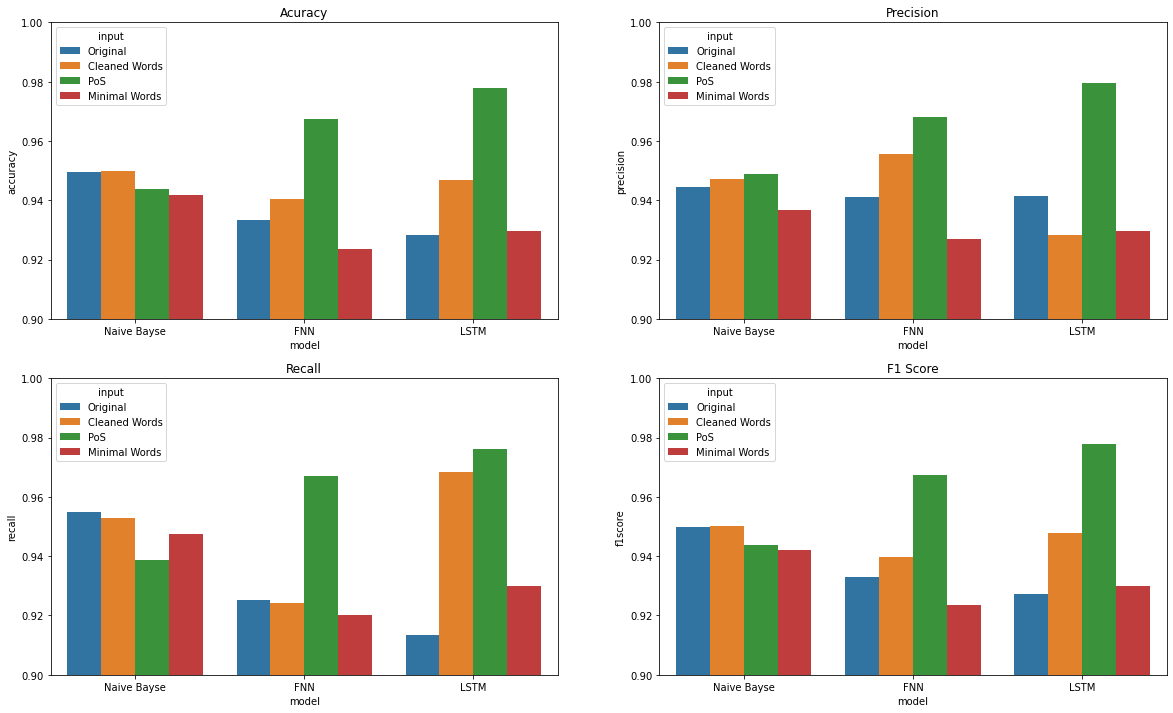

In [36]:
plt.rcParams["figure.figsize"] = (20,12)

fig, ax = plt.subplots(2, 2)

ax[0, 0].set_title('Acuracy')
ax[0, 0].set_ylim(0.9, 1.0)
sns.barplot(x="model", y="accuracy", hue="input", data=df_summary, ax = ax[0, 0])

ax[0, 1].set_title('Precision')
ax[0, 1].set_ylim(0.9, 1.0)
sns.barplot(x="model", y="precision", hue="input", data=df_summary, ax = ax[0, 1])

ax[1, 0].set_title('Recall')
ax[1, 0].set_ylim(0.9, 1.0)
sns.barplot(x="model", y="recall", hue="input", data=df_summary, ax = ax[1, 0])

ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylim(0.9, 1.0)
sns.barplot(x="model", y="f1score", hue="input", data=df_summary, ax = ax[1, 1])

plt.show()

### Findings
- **LSTM with PoS (part of speech)** tagging input showed the **best performance**.
- Naive bayse showed less dependency on input data, wheras both FNN and LSTM showed much batter performance with PoS tags. It tells **grammar structure is the strongest feature of classification** in this dataset.
- Unlike my naive expectation, (Minimal Words) showed worst performance. It tells **noise of text plays an important role in fake news classification**.

# Right/Wrong classification examples

In [ ]:
# 틀린것 예시, model x seq 마다
# p0 높은것, p1 높은것 특징 
# 위 둘 섞어서, y_true랑 p 차이 큰것, 작은것 특징

# 위에서 찾은 힌트로 모델별 맞고 틀리고 조합

In [39]:
df.columns[6]

'nb_og'

In [63]:
df_r = []
df_w = []

for i in range(3):
    for j in range(4):
        k = i*4 + j
        x_name = df.columns[1+j]
        y_name = ml_type_abb[i]+'_'+seq_type_abb[j]
        
        r = df[df.y_true==df[y_name]][[x_name,'y_true',y_name+'_p1']]
        w = df[df.y_true!=df[y_name]][[x_name,'y_true',y_name+'_p1']]
        
        r['gap'] = abs(r[y_name+'_p1']-r.y_true)
        w['gap'] = abs(w[y_name+'_p1']-w.y_true)
        
        r.sort_values(by=['gap'],axis=0,inplace=True)
        w.sort_values(by=['gap'],axis=0,inplace=True)
        
        df_r.append(r)
        df_w.append(w)        

In [67]:
for i in range(3):
    for j in range(4):
        k = i*4 + j
        title = ml_type[i],seq_type[j]
        
        print(title,' Right, confident')
        display(df_r[k].iloc[:10])
        
        print(title,' Right, subtle')
        display(df_r[k].iloc[-10:])
        
        print(title,' Wrong, subtle')
        display(df_w[k].iloc[-10:])        
        
        
        print(title,' Wrong, confident')
        display(df_w[k].iloc[:10])
        

        

('NaiveBayse', 'Original')  Right, confident


,org_title,y_true,nb_og_p1,gap
2657,“HOW CAN WE GET BEHIND SUCH CORRUPTION?” CNN PANEL Shocked by Truth from Black Patriot After They Tried to Tell Him He’s Wrong About the Racist DNC [Video],1,1.0,0.0
1204,WATCH: MALIA OBAMA ANGRILY SNAPS at Woman For Asking To Take Picture With Her Grandson at Harvard: “Are you gonna take it in my face like an animal in a cage?”,1,1.0,0.0
853,"WOW! MACON, GA RESIDENT SLAMS Rep John Lewis: “What have you accomplished? Why don’t you go on the news and talk about the black-on-black terrorism that’s happening in Chicago?”[VIDEO]",1,1.0,0.0
1187,WATCH: This Priceless Video HILARIOUSLY Exposes Trump And His Doctor For What They Really Are,1,1.0,0.0
3398,"(VIDEO) MICHELLE OBAMA GIVES AWKWARD RANT: You know, You know… Barack ‘works all the time,’ ‘he is never off’",1,1.0,0.0
931,BREAKING HIDDEN VIDEO Exposes Racist Dems Comparing Black Republicans To Jews Who Helped Nazis [Video],1,1.0,0.0
2593,WATCH: MALIA OBAMA ANGRILY SNAPS at Woman For Asking To Take Picture With Her Grandson at Harvard: “Are you gonna take it in my face like an animal in a cage?”,1,1.0,0.0
3483,BLACK HOMICIDE VICTIMS Killed Mostly By Black Criminals Jumps 900 Per Yr. Since Start Of Black Lives Matter…Number Of Cops Killed By Blacks Is STUNNING,1,1.0,0.0
2756,WOW! HILLARY CAUGHT ON VIDEO In 2000 Saying She Doesn’t Like Emails Because You Can’t Hide Them From Investigators,1,1.0,0.0
990,BLACK CONSERVATIVE Student DESTROYS Black Lives Crybabies: “I Am Katie Danforth And I Am Working My A*S Off To Become Something” [VIDEO],1,1.0,0.0


('NaiveBayse', 'Original')  Right, subtle


,org_title,y_true,nb_og_p1,gap
2925,Texas congressman will not seek re-election in wake of nude photo,0,0.476098,0.476098
345,Ramadan Abdullah Set Free On Bail After Police Make Shocking Discovery Of Weapons In Storage Locker Destined For Secretive Islamic Compound In Upstate NY,1,0.522419,0.477581
3857,Trump knew for weeks that aide was being misleading over Russia: White House,0,0.484159,0.484159
58,'This is not a life': migrants stranded on Greek island,0,0.485674,0.485674
2214,Trump says he will 'absolutely do safe zones' in Syria,0,0.486125,0.486125
198,U.S. has room to fight any future downturn with spending: Furman,0,0.486870,0.486870
3277,Security hustles Trump from stage after protester displays sign,0,0.488898,0.488898
2669,Poll: 0.0% Of Young Icelanders Support Creationism,1,0.505982,0.494018
546,GERMAN CARNIVAL CANCELLED Over Fears Of Muslim Refugee Sex Attacks,1,0.503826,0.496174
844,Prof Michel Chossudovsky discusses Hillary Clinton’s foreign policy & emerging nuclear risks,1,0.502409,0.497591


('NaiveBayse', 'Original')  Wrong, subtle


,org_title,y_true,nb_og_p1,gap
1431,China Warns Trump: Provoke North Korea And ‘Pay The Price’,1,6.842094e-04,0.999316
3915,CLINTON GRIFTERS UNDER SCRUTINY: CLINTON GLOBAL INITIATIVE DUMPED BY EXXON MOBIL,1,5.570235e-04,0.999443
2233,Liberal Warren throws down gauntlet to President-elect Trump,0,9.995858e-01,0.999586
3065,Sweet home Chicago: Obama re-emerges in city where it all began,0,9.996400e-01,0.999640
1535,RUSSIA’S RED LINE: Moscow Announces End to US ‘Deconfliction’ Cooperation Over Syria,1,3.346411e-04,0.999665
3893,Rigged elections? Nasty woman? Trump's scorched earth tactics have little upside,0,9.996833e-01,0.999683
3164,'Nasty woman' and Ken Bone: election's viral stars a hit for Halloween,0,9.998199e-01,0.999820
2168,"Trump Transition: As Secretary of State, Tulsi Gabbard offers potential for peace with Syria, Russia",1,1.589555e-04,0.999841
3187,"Trump tweets mock video of himself tackling, punching CNN logo",0,9.999987e-01,0.999999
2806,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,8.869442e-07,0.999999


('NaiveBayse', 'Original')  Wrong, confident


,org_title,y_true,nb_og_p1,gap
2397,U.N. Report: Police Killings Of Black Men In U.S. Is ‘Human Rights Crisis’ Reminiscent Of Lynching,1,0.496872,0.503128
423,Venezuelan bishops tell pope of 'truly desperate' situation,0,0.503975,0.503975
2856,Congressional race in Virginia shows Trump drag on Republicans,0,0.514092,0.514092
871,Former Reagan aide helped write Trump foreign policy speech,0,0.517031,0.517031
3449,Clinton’s Latest Electoral Appeal? Mormon Voters – And It Could Work,1,0.479785,0.520215
2239,Federal prosecutors question NYC mayor over fundraising: reports,0,0.529263,0.529263
2801,MarkLevin is Freaking Awesome: Obama negotiates with Iran; Iranian general says Israel’s destruction is not negotiable,1,0.468445,0.531555
243,Franken to make 11:45 a.m. announcement after harassment accusations,0,0.538630,0.538630
1070,Five Things To Look Out For With Trump’s Pentagon,1,0.460054,0.539946
2478,Five Things To Look Out For With Trump’s Pentagon,1,0.460054,0.539946


('NaiveBayse', 'CleanedWords')  Right, confident


,cleaned_words,y_true,nb_cw_p1,gap
3284,liberal heads explode when piers morgan points out phony racist charges against trump vs . muhammad ali s actual racist history _mytag_parentheses_,1,1.0,0.0
2978,liberal trevor noah didn t count on conservative tomi lahren destroying him on his own show but that s exactly what she did ! _mytag_parentheses_,1,1.0,0.0
2189,bloody 4th of july weekend update : obama s hometown of chicago 64 shot 6 killed including 39 yr old father 3 and 10 yr old daughters black reverend cautions those who blame guns or cops,1,1.0,0.0
533,the witch s assistant : watch huma abedin s icy reaction when hillary supporter tries to hug her _mytag_parentheses_,1,1.0,0.0
2132,watch : arrogant sexual predator and sometimes comedian louis c . k . tells stephen colbert donald trump is an insane bigot and hitler,1,1.0,0.0
3594,conservatives who disrupted trump assassination play speak out : it was like a gang stabbing i watched everyone cheering his death laughing clapping along children in the audience . it made my blo...,1,1.0,0.0
2071,boom ! hey democrats . why the violent riots ? young american proves dems really don t care about jobs helping minorities or women _mytag_parentheses_,1,1.0,0.0
3274,watch protesters at dnc : i ll take trump over hillary any day she won t win if it comes to black votes crowd shouts : don t vote for hillary she s killing black people,1,1.0,0.0
3621,wow ! remember when media said trump mocked disabled reporter ? here s proof they lied ! _mytag_parentheses_,1,1.0,0.0
2970,this anti semitic trump supporter wants you to know he s actually just racist _mytag_parentheses_,1,1.0,0.0


('NaiveBayse', 'CleanedWords')  Right, subtle


,cleaned_words,y_true,nb_cw_p1,gap
1581,false flag attack against cuba : a plan hatched by the pentagon,1,0.535348,0.464652
345,ramadan abdullah set free on bail after police make shocking discovery of weapons in storage locker destined for secretive islamic compound in upstate ny,1,0.534315,0.465685
1181,long a rival ted cruz endorses trump in u . s . presidential race,0,0.469458,0.469458
2925,texas congressman will not seek re election in wake of nude photo,0,0.472912,0.472912
198,u . s . has room to fight any future downturn with spending : furman,0,0.486902,0.486902
58,this is not a life : migrants stranded on greek island,0,0.487439,0.487439
243,franken to make 11 : 45 a . m . announcement after harassment accusations,0,0.487916,0.487916
3857,trump knew for weeks that aide was being misleading over russia : white house,0,0.490696,0.490696
546,german carnival cancelled over fears of muslim refugee sex attacks,1,0.508715,0.491285
3277,security hustles trump from stage after protester displays sign,0,0.493426,0.493426


('NaiveBayse', 'CleanedWords')  Wrong, subtle


,cleaned_words,y_true,nb_cw_p1,gap
1769,tillerson to north korea : we are not your enemy u . s . seeks dialogue not regime change,1,3.642523e-04,0.999636
3065,sweet home chicago : obama re emerges in city where it all began,0,9.996480e-01,0.999648
3893,rigged elections ? nasty woman ? trump s scorched earth tactics have little upside,0,9.996902e-01,0.999690
3164,nasty woman and ken bone : election s viral stars a hit for halloween,0,9.998295e-01,0.999830
2168,trump transition : as secretary of state tulsi gabbard offers potential for peace with syria russia,1,1.632613e-04,0.999837
1388,philippines : 2016 washington s fury as philippine s elections threaten u . s . anti china policy,1,9.787399e-05,0.999902
429,sunnistan : u . s . and allied safe zone plan to take territorial booty in northern syria,1,9.422662e-05,0.999906
3187,trump tweets mock video of himself tackling punching cnn logo,0,9.999422e-01,0.999942
1535,russia s red line : moscow announces end to u . s . deconfliction cooperation over syria,1,2.912176e-05,0.999971
2806,stockholm study : u . s . and europe top arms trade globally saudi arabia s weapons imports skyrocket over 200 percent,1,9.735847e-07,0.999999


('NaiveBayse', 'CleanedWords')  Wrong, confident


,cleaned_words,y_true,nb_cw_p1,gap
3449,clinton s latest electoral appeal ? mormon voters and it could work,1,0.492535,0.507465
423,venezuelan bishops tell pope of truly desperate situation,0,0.507859,0.507859
1229,republican congressional candidate in montana cited after incident with reporter sheriff,0,0.513877,0.513877
1441,to wonks hungry for policy details trump team serves lighter fare,0,0.515648,0.515648
2856,congressional race in virginia shows trump drag on republicans,0,0.518616,0.518616
871,former reagan aide helped write trump foreign policy speech,0,0.521552,0.521552
2801,marklevin is freaking awesome : obama negotiates with iran ; iranian general says israel s destruction is not negotiable,1,0.473716,0.526284
2239,federal prosecutors question nyc mayor over fundraising : reports,0,0.533272,0.533272
2478,five things to look out for with trump s pentagon,1,0.464557,0.535443
1070,five things to look out for with trump s pentagon,1,0.464557,0.535443


('NaiveBayse', 'PoS')  Right, confident


,minimal_words,y_true,nb_ps_p1,gap
1597,maxine double crazy msnbc host hard time keeping straight face maxine reveals believe fed trump crook hillary lock line _mytag_parentheses_,1,1.000000e+00,3.851253e-12
307,insane video graduation time mean time racist first lady spew hateful lie rhetoric racist white america mistreatment black,1,1.000000e+00,5.794365e-12
1143,russian opposition leader fraud conviction arbitrary europe top right court say,0,8.355869e-12,8.355869e-12
1046,libs twitter nut kellyanne conway shoe couch oval office probably forgot obama pic bill clinton oval office,1,1.000000e+00,9.142198e-11
1052,allahu akbar muslim extremist forced catholic priest knifepoint kneel perform arabic sermon filmed beheading priest two terrorist shot dead old known terrorist allowed live parent roamed freely da...,1,1.000000e+00,1.096510e-10
3504,dreamer skepticism dog envoy north korean peace effort,0,1.293988e-10,1.293988e-10
2189,bloody 4th july weekend update obama hometown chicago shot killed include old father old daughters black reverend caution blame gun cop,1,1.000000e+00,2.414212e-10
1490,bloody 4th july weekend update obama hometown chicago shot killed include old father old daughters black reverend caution blame gun cop,1,1.000000e+00,2.414212e-10
380,obama vacation hand billion dollar gift kenyan iran ayatollah tweet picture barack gun head,1,1.000000e+00,4.613464e-10
2623,put bullet head scuffle break legislator gop rep call ice angry illegal alien crash chamber protest sanctuary city ban _mytag_parentheses_,1,1.000000e+00,1.243322e-09


('NaiveBayse', 'PoS')  Right, subtle


,minimal_words,y_true,nb_ps_p1,gap
3319,penny reassure japan resolve north korea work china,0,0.475361,0.475361
3150,trump administration review cuba policy white house spokesman,0,0.475489,0.475489
2134,trump say would bail puerto rico,0,0.477608,0.477608
1778,white house blast republican house benghazi panel report,0,0.478830,0.478830
319,barbaric bully set disable year old boy fire _mytag_parentheses_,1,0.520682,0.479318
1135,north korea threat critical imminent japan tell south korea,0,0.485236,0.485236
644,lavrov trump attack venezuela,1,0.507749,0.492251
3709,senate republican leader obama politicize supreme court process,0,0.496072,0.496072
596,erdogan say sacrifice strategic ally turkey,0,0.499142,0.499142
26,watch bush gush kimmel anti trump oscar monologue refused speak obama good country former president undermine current president,1,0.500145,0.499855


('NaiveBayse', 'PoS')  Wrong, subtle


,minimal_words,y_true,nb_ps_p1,gap
747,new jersey governor christie say urge trump leave republican party,0,0.995673,0.995673
3664,watch trump supporting conservative writer say race _mytag_slans_ remark,1,0.003420,0.996580
3352,2017 america liberal abortion agenda look lot like nazi eugenics,1,0.002707,0.997293
2477,local government pass resolution impeach trump _mytag_parentheses_,1,0.001592,0.998408
1116,dubious report advertisement seek trump protester get pay fighting trump,1,0.001293,0.998707
2923,numerous public rape teenage girl report swedish music festival rape swedish festival really news anymore,1,0.001214,0.998786
670,student terrorize minority disgust kkk video punishment shockingly light,1,0.000905,0.999095
2094,maxine water people try discredit _mytag_parentheses_,1,0.000847,0.999153
1914,low income renter lose home rich people neighborhood trendy,1,0.000285,0.999715
2798,high school warns student terrorists need fear domestic white christian men easy access gun,1,0.000002,0.999998


('NaiveBayse', 'PoS')  Wrong, confident


,minimal_words,y_true,nb_ps_p1,gap
1383,keith olbermann betsy devos hurricane go less damage school _mytag_slans_,1,0.499032,0.500968
3600,eye indiana victory trump say,0,0.503026,0.503026
1848,mexico say keep embassy israel tel aviv,0,0.503358,0.503358
1998,bernie sander mission,1,0.495033,0.504967
1312,factbox former fbi director comey testimony conversation trump,0,0.506679,0.506679
1990,prominent religious conservative defend trump charlottesville,0,0.509617,0.509617
725,disturb uncover email huma abedin bring hillary mental health question often confused,1,0.487290,0.512710
3590,brussels tillerson offer strong support,0,0.514489,0.514489
384,man almost die flight crew think black woman doctor,1,0.483752,0.516248
1400,trump say believe pakistan start respect,0,0.516710,0.516710


('NaiveBayse', 'MinimalWords')  Right, confident


,cleaned_pos,y_true,nb_mw_p1,gap
1252,NNP NNP NNP NNP NNP NNP NNP VBZ VBG JJ NNP NNP CD NNP NNP NNP NNP NNP IN NNP NNP NNP TO VB NNP NNP NNP,1,1.0,0.0
1597,NNP NNP NNP NNP NNP : NNP NNP NNP NNP NNP NNP NNP NNP WRB NNP NNPS WP PRP VBZ NNP NNP VBD NNP CC NNP NNP NNP NNP NNP,1,1.0,0.0
963,NNP NNP NNP NNP NNP NNP PRP VBD VBG NNP IN VBG DT JJ NNP CC IN NN IN NN IN PRP VBD NNP IN NNP NNP NNP NNP NNP NN,1,1.0,0.0
933,NN . NNP NNP NNP NNP NNP NNP NNP NNP . IN PRP VBP NNP NNP NNPS IN NNP NNP TO NNP NNP NN,1,1.0,0.0
931,NNP NNP NNP NNP NNP NNP NNP NNP NNPS TO NNPS NNP VBD NNP VB,1,1.0,0.0
1052,JJ NNP NNP NNP NNP NNP NNP IN NNP TO NNP IN PRP VBD NNP NNP NNP IN NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP TO VB IN NNP NNP NNP IN NNP NNP,1,1.0,0.0
1803,NNP NNP NNP NNP NNP NNP : NNP NNP NNP NNP NNP NNP NNP IN NNP NNPS TO NNP NNP NNP NNP NNP NNP VBG RB . NN,1,1.0,0.0
920,NNP NNP NNP NNP NNP NNP IN NNP NNP NNP NNP : NN VBZ NNP VBZ DT JJ NN . NN,1,1.0,0.0
1324,NN : JJ NNP NNP IN NNP NNP NNP NNP : NNS VBP IN NN NN,1,1.0,0.0
3626,NNS : NNP NNP NNP NNP NNP NNP IN JJS JJ NNP NNP IN NNP NNP NN,1,1.0,0.0


('NaiveBayse', 'MinimalWords')  Right, subtle


,cleaned_pos,y_true,nb_mw_p1,gap
2590,NNP PRP VBP IN JJ NN VBZ TO NNP,0,0.465229,0.465229
1429,NNP VBZ IN JJ NNS CC VBZ NN DT NN,0,0.470570,0.470570
2315,NNP NNP NNP NNP NNP NNP NNP : NN VBZ VBG TO VB NNP NNP NNP,1,0.524771,0.475229
198,NNP VBZ NN TO VB DT JJ NN IN NN : NN,0,0.475629,0.475629
3277,NN NNS VBP IN NN IN NN NNS NN,0,0.476365,0.476365
27,NNP NNP IN NNP NNP NNP NNP IN NNP NNP NNP CC NNP NNP PRP,1,0.513937,0.486063
2296,JJ NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP NNS,1,0.509265,0.490735
3179,IN JJ NN NNP POS NNP MD VB NNS,0,0.491899,0.491899
1630,RB VBN IN NNP NN NN NN NN,0,0.493701,0.493701
744,NNP NNP NNP PRP VBZ JJ TO NNP NNP DT NNP TO PRP$ NNP NNP,1,0.503890,0.496110


('NaiveBayse', 'MinimalWords')  Wrong, subtle


,cleaned_pos,y_true,nb_mw_p1,gap
1535,NNP NNP NNP : NNP NNPS NNP TO NNP NNP NNP IN NNP,1,0.000242,0.999758
3164,JJ NN CC NNP NNP : NN POS JJ VBZ DT NN IN NNP,0,0.999768,0.999768
1243,NNP NNP NNP NNP NNP TO VB NNP CC NNP NNP IN NNP NNP NNP NNP,1,0.000225,0.999775
861,NNP NNP CD NN IN NNP IN VBG CD NNP IN NNP NNP NNP CC NNS,1,0.000213,0.999787
1388,NN : CD NNP NNP IN NNP NNP NNP NNP NNP NN,1,0.000196,0.999804
1431,NNP NNP NNP : NNP NNP NNP CC VBD DT NNP,1,0.000139,0.999861
728,NNP NNP NNP NNP NNP VBD JJ IN NN NN,0,0.999947,0.999947
3187,NNP NNS VBP NN IN PRP VBG VBG NNP NN,0,0.999957,0.999957
2806,NNP NNP : NNP CC NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP IN CD NN,1,0.000010,0.999990
1769,NNP TO NNP NNP : NN NNP RB PRP$ NNP NNP NNP NNP RB NNP NNP,1,0.000004,0.999996


('NaiveBayse', 'MinimalWords')  Wrong, confident


,cleaned_pos,y_true,nb_mw_p1,gap
3143,NNP NNP NNP NNP NNP NNP NNP NNP IN NNP NN,1,0.498853,0.501147
833,NNP POS NN NN NN : NN,0,0.502889,0.502889
1267,NNP IN CD CD : DT NN NNP IN DT JJ NNP NNP IN NNP,1,0.495843,0.504157
1181,RB DT JJ NNP NNP VBZ NNP IN NNP JJ NN,0,0.505544,0.505544
719,NN . NN : VBP DT NNP NNP NNP IN DT NNP NNP NNP .,1,0.491810,0.508190
2224,NN . NN : VBP DT NNP NNP NNP IN DT NNP NNP NNP .,1,0.491810,0.508190
2723,NNP NN VBZ TO VB NN NN TO VB RP NNS NNS,0,0.508443,0.508443
3486,NNP NNP NNP NNP : NNPS VBP TO VB NNP,0,0.510028,0.510028
541,NNP VBZ NN IN NN IN NNP JJ NN,0,0.511928,0.511928
414,NNP NNP NNP NNP NNP NNP IN NNP NNP NNP IN NNP NNP IN NNP,1,0.484151,0.515849


('FNN', 'Original')  Right, confident


,org_title,y_true,fnn_og_p1,gap
2011,Patrick Henningsen LIVE with guest Sean Stone – ‘Project for a New Global Government?’,1,1.0,0.0
537,Kellyanne Conway Lashes Out After Alma Mater Blasts Her For Being A Liar,1,1.0,0.0
1871,Trump Suggests White Anti-Semites NOT Attacking Jews – Who He Thinks It Is Will Make You Sick,1,1.0,0.0
1870,"APPARENTLY “NEVER AGAIN” DOESN’T RESONATE WITH MAJORITY OF JEWS IN AMERICA, As Shocking Poll Shows Majority Of Jews Are Okay With Iran Deal",1,1.0,0.0
1869,Democratic Senator Voted To Confirm Career Racist Sessions And What Happened Next Is PERFECT (SCREENSHOTS/TWEETS),1,1.0,0.0
1866,Halloween Fireside Book of Suspense Vol. 2: Boiler Room EP #133,1,1.0,0.0
542,"20 TIME DEPORTED MEXICAN Laughs While Being Sentenced For Sodomy, Kidnapping and Sexual Assault In SANCTUARY STATE of Oregon…Tells Victims’ Relatives: “See All You Guys In Hell!” [VIDEO]",1,1.0,0.0
1863,Ann Coulter Goes Full Bigot – Calls Khizr Khan A ‘Snarling Muslim’ In Televised Rant (VIDEO),1,1.0,0.0
1862,Daniel Greenfield: Why Obama Really Spied On Trump: ‘It’s not just ideology. It’s raw fear.’,1,1.0,0.0
1874,Twitter Users Give Cowardly Trump Hilarious Excuses To Skip Debates Against Hillary,1,1.0,0.0


('FNN', 'Original')  Right, subtle


,org_title,y_true,fnn_og_p1,gap
87,U.S. citizen on the run after busting out of Bali prison,0,0.446097,0.446097
2534,Trump campaign manager charged with misdemeanor battery against reporter,0,0.452061,0.452061
3435,Brazil's president to begin cabinet reshuffle: press office,0,0.452869,0.452869
340,Trump Tells Japanese Diplomats He Never Knew There Were So Many Countries In The World,1,0.540186,0.459814
3638,'Is this the Trump we know?' South Koreans wax sanguine after Trump visit,0,0.465509,0.465509
588,Protesters Block Downtown Chicago Streets And Michigan Avenue,1,0.533496,0.466504
3240,CHECKMATE! PUTIN Offers Up Proof Of Trump’s Innocence [Video],1,0.521204,0.478796
2119,"Lesbian Couple Beaten, Arrested For Holding Hands Wins $80,000 Settlement (VIDEO)",1,0.515268,0.484732
1396,"U.S. plans to admit maximum 45,000 refugees in next fiscal year",0,0.486093,0.486093
891,Charges dropped against woman who laughed at Trump nominee Sessions,0,0.487324,0.487324


('FNN', 'Original')  Wrong, subtle


,org_title,y_true,fnn_og_p1,gap
3298,Trump believes Roy Moore should step aside if allegations are true -White House,0,9.999671e-01,0.999967
187,"Gun Dealer Backs Out Of Selling Zimmerman’s Murder Weapon, Closes Social Media Accounts",1,3.251261e-05,0.999967
2233,Liberal Warren throws down gauntlet to President-elect Trump,0,9.999752e-01,0.999975
2025,UNBELIEVABLE: OBAMA Stands Firm On Taking Random Refugees…Leaves Targeted Iraq And Afghan Interpreters Who Helped U.S. Troops Behind,1,4.630564e-06,0.999995
3164,'Nasty woman' and Ken Bone: election's viral stars a hit for Halloween,0,9.999955e-01,0.999995
1142,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,3.892603e-06,0.999996
3187,"Trump tweets mock video of himself tackling, punching CNN logo",0,9.999981e-01,0.999998
2573,Iraqi PM Rebuffs U.S. Decree That ‘Foreign Shia Militias’ Should Leave Country,1,2.903022e-07,1.000000
589,Factbox: Donald Trump Jr.'s lawyer has experience with the mob and music,0,9.999999e-01,1.000000
3893,Rigged elections? Nasty woman? Trump's scorched earth tactics have little upside,0,1.000000e+00,1.000000


('FNN', 'Original')  Wrong, confident


,org_title,y_true,fnn_og_p1,gap
833,World's stateless deserve nationality: UNHCR,0,0.501588,0.501588
3567,"In hero's return, McCain blasts Congress, tells senators to stand up to Trump",0,0.517331,0.517331
2501,"CASTING CRISIS: Orlando’s Actors, Agents and Casualty Role Players",1,0.464190,0.535810
911,WHO NEEDS DEMOCRATS? GOP Consultant Says Establishment Needs To “Put a bullet” In Trump’s Head,1,0.448337,0.551663
3244,#BoycottGrammys… #TurnOffTheGrammys…Grammys Producer Encourages Stars To Get Political…TRASH TRUMP…Just Don’t Use “F-Bomb” Before 10 PM,1,0.445279,0.554721
286,Exclusive: Koch brothers will not use funds to try to block Trump nomination,0,0.556182,0.556182
1414,OUTRAGE! HOW REFUGEE RESETTLEMENT Is Using United States As Dumping Ground To Settle Diplomatic Disputes,1,0.442992,0.557008
2334,Trump Threatens Government Shutdown If Congress Doesn’t Approve Billions To Fund His Border Wall,1,0.438870,0.561130
3416,"Trump TRASHES Sean Spicer’s Cell Phone Checks, Signals Trump Team Implosion (VIDEO)",1,0.437186,0.562814
1588,PLANNED PARENTHOOD Draws Outrage After Mother’s Day Tweet,1,0.407776,0.592224


('FNN', 'CleanedWords')  Right, confident


,cleaned_words,y_true,fnn_cw_p1,gap
1487,awesome ! attorney general jeff sessions just drained the doj swamp,1,1.0,0.0
2719,disney introduces new marvel comic books : captain america captain socialist beats up conservative terrorists defending u . s . borders and more _mytag_parentheses_,1,1.0,0.0
1378,rape apparently doesn t earn jail time anymore even if the victim is only two years old,1,1.0,0.0
1375,cnn host cuts interview after trump supporter pathetically tries to link hillary to child rapist _mytag_parentheses_,1,1.0,0.0
554,donald trump just told his fans they re stupid to their faces and they cheered _mytag_parentheses_,1,1.0,0.0
556,watch : mike pence laughs at his own running mate when asked about pathetic black voter outreach,1,1.0,0.0
557,watch these troops react as jimmy fallon and adam sandler honor them with hilarious country song,1,1.0,0.0
2730,nyt s race obsessed liberal columnist goes nuts on cnn when conservative pundit touches his arm _mytag_parentheses_,1,1.0,0.0
1368,meet conservative muslim steve bannon hired for key position at breitbart : only thing left knows are smears lies hate libel defamation and an abdication of decency,1,1.0,0.0
3459,college students who wanted you to pay for their education make stunning admissions about how they spend student loan money,1,1.0,0.0


('FNN', 'CleanedWords')  Right, subtle


,cleaned_words,y_true,fnn_cw_p1,gap
822,trump accuses u . s . spy agencies of nazi practices over phony russia dossier,0,0.390768,0.390768
2588,green republicans resist trump s climate denial in cleveland,0,0.393309,0.393309
1873,holy contraception ! pope francis tells latin americans to use condoms lesser of two evils,1,0.593937,0.406063
422,huckabee backs trump s comments on protests : is he supposed to do what barack obama used to do and jump to conclusions,1,0.563870,0.436130
303,fractured republicans come together in face of trump triumph,0,0.445888,0.445888
1818,watch : kim jong un blows up u . s . aircraft carrier in newly released video,1,0.536143,0.463857
2629,republican senators don t want ted cruz anywhere near their re election campaigns,1,0.528966,0.471034
3587,london mosque with links to terrorists is terrorized by vengeful londoner _mytag_parentheses_,1,0.521386,0.478614
708,obama will send representative to alton sterling funeral couldn t be bothered with supreme court justice scalia s funeral,1,0.514165,0.485835
3682,detroit school system s manager to step down this month,0,0.491991,0.491991


('FNN', 'CleanedWords')  Wrong, subtle


,cleaned_words,y_true,fnn_cw_p1,gap
1663,elite nazi allied order from hungary claims trump adviser sebastian gorka is sworn member,1,0.000120,0.999880
2947,_mytag_parentheses_ rioters take selfies with torched police car,1,0.000084,0.999916
944,former cia nsa chief says trump s unlawful orders would not be followed by the armed forces _mytag_parentheses_,1,0.000055,0.999945
2173,senate gives trump jr . ultimatum : respond by friday or face subpoena,1,0.000049,0.999951
546,german carnival cancelled over fears of muslim refugee sex attacks,1,0.000023,0.999977
3187,trump tweets mock video of himself tackling punching cnn logo,0,0.999986,0.999986
2573,iraqi pm rebuffs u . s . decree that foreign shia militias should leave country,1,0.000001,0.999999
3893,rigged elections ? nasty woman ? trump s scorched earth tactics have little upside,0,1.000000,1.000000
2964,go to hell ! a divided america struggles to heal after ugly election,0,1.000000,1.000000
3164,nasty woman and ken bone : election s viral stars a hit for halloween,0,1.000000,1.000000


('FNN', 'CleanedWords')  Wrong, confident


,cleaned_words,y_true,fnn_cw_p1,gap
1503,prophecy propaganda : zionist millennialism refuted,1,0.498100,0.501900
296,tiger tips clinton bear backs trump in siberian zoo s mock vote,0,0.517438,0.517438
878,former ku klux klan leader duke runs for u . s . senate in louisiana,0,0.526268,0.526268
3531,global backlash grows against trump s immigration order,0,0.527935,0.527935
1990,prominent u . s . religious conservatives defend trump after charlottesville,0,0.529580,0.529580
2020,fuming trump calls his colorado loss the biggest story in politics after cruz wins all 34 delegates _mytag_parentheses_,1,0.469208,0.530792
3356,racists are thrilled with trump s new campaign boss,1,0.456752,0.543248
735,republican senator paul threatens no vote on budget plan,0,0.543515,0.543515
3033,a tampon tax ? women suing their state for unfair tax calling tampons a luxury item,1,0.447767,0.552233
3465,over 40 percent of america supports impeaching donald trump,1,0.443031,0.556969


('FNN', 'PoS')  Right, confident


,minimal_words,y_true,fnn_ps_p1,gap
2000,dana loesch rip obama hillary gun control prisoner control _mytag_parentheses_,1,1.0,0.0
1352,watch view liberal hag attack meghan mccain defend flag first day new host,1,1.0,0.0
3249,liberal utopia chicago american die left right rahm emanuel unveils fancy illegals,1,1.0,0.0
3251,donald trump throw massive hissy fit johnny depp bad joke,1,1.0,0.0
3252,detroit cop fire facebook post racists piece _mytag_parentheses_ black live matter terrorist supporter _mytag_parentheses_,1,1.0,0.0
1343,republican explodes obama foil evil scheme sell apache holy land mining firm,1,1.0,0.0
1342,bah humbug protest petition start obama gave government worker christmas gift,1,1.0,0.0
1341,last video ever paul joseph watson explains youtube censor conservative,1,1.0,0.0
1355,day remaining office obama suddenly take interest chicago crime discusses commuting crooked politician rod blagojevich _mytag_parentheses_,1,1.0,0.0
3255,cnn reporter embarrasses idiotic response former face nation host praise trump saudi arabia speech _mytag_parentheses_,1,1.0,0.0


('FNN', 'PoS')  Right, subtle


,minimal_words,y_true,fnn_ps_p1,gap
3890,hillary trump offensive woman rubio rest,1,0.542440,0.457560
3381,responsible gun owner road rage threaten shoot motorcyclist _mytag_parentheses_,1,0.541359,0.458641
2119,lesbian couple beaten arrested holding hand win 000 settlement _mytag_parentheses_,1,0.541336,0.458664
3681,house speaker ryan lawmaker likely come together puerto rico,0,0.470038,0.470038
1991,must see gutting nafta unlikely create job,0,0.472719,0.472719
2748,mccain say russia test ukraine urge trump hit back,0,0.474472,0.474472
2474,american look canada trump surge victory,0,0.481557,0.481557
8,expose oligarchy rule billionaire dictator,1,0.515714,0.484286
962,cia inspector hillary endanger lives former judge hillary prime candidate prosecution,1,0.508358,0.491642
887,breaking sensitive benghazi mail release christmas eve document dump,1,0.507635,0.492365


('FNN', 'PoS')  Wrong, subtle


,minimal_words,y_true,fnn_ps_p1,gap
947,mulvaney legal stand take charge consumer financial protection bureau white house,0,0.997493,0.997493
2430,obama make known fan flynn white house spokesman,0,0.998630,0.998630
878,former klux klan leader duke run senate louisiana,0,0.999146,0.999146
747,new jersey governor christie say urge trump leave republican party,0,0.999215,0.999215
3480,paul manafort rick gate,0,0.999306,0.999306
1079,facebook decide brand fake news,1,0.000617,0.999383
3352,2017 america liberal abortion agenda look lot like nazi eugenics,1,0.000428,0.999572
218,factbox consumer financial protection bureau,0,0.999629,0.999629
3882,river town slovenia trump tower white house,0,0.999961,0.999961
3638,trump know south korean wax sanguine trump visit,0,0.999961,0.999961


('FNN', 'PoS')  Wrong, confident


,minimal_words,y_true,fnn_ps_p1,gap
1912,obama unveil supreme court nomination soon senator reid,0,0.501679,0.501679
2468,ariana grande return follow manchester bomb,0,0.512846,0.512846
1333,anti abortionist comment flint crisis prove pro life republican exist _mytag_parentheses_,1,0.484606,0.515394
3465,percent america support impeaching donald trump,1,0.481581,0.518419
856,trump tap montana congressman zinke lead interior department,0,0.518458,0.518458
1138,beijing see poise fresh south china sea assertiveness,0,0.520437,0.520437
1522,report donald trump tried back penny announcement,1,0.474888,0.525112
547,hillary obama call king dog,1,0.468755,0.531245
1546,democrat donnelly support trump pick supreme court,0,0.532408,0.532408
1082,brill step federal trade commission,0,0.532994,0.532994


('FNN', 'MinimalWords')  Right, confident


,cleaned_pos,y_true,fnn_mw_p1,gap
506,NN : NNP NNP NNP TO VB JJ NNP TO VB JJ NNP CC NNP IN NNP NNP NN,1,1.0,0.0
2071,NN . NNP NNP DT NNP NNP . JJ NNP NNPS NNP NNP NNP NNP IN NNP NNP NNPS CC NNP VBP,1,1.0,0.0
3283,NNP NNP NNP NNP NNP TO VB NNP IN NNP NNP NNP NNP NNP NNP NNP TO VB DT NN,1,1.0,0.0
3284,NNP NNP NNP WRB NNP NNP VBZ RP NNP NN NNP NNP NNP NNP NNP NNP NNP NNP NNP NN,1,1.0,0.0
1842,NNP NNP NNP WRB NNP NNP NNP NNP NNP NNP VBD NNP NNP NNP NNP IN NNP NNP NN,1,1.0,0.0
1151,NN : NNP NNP NNP NNP NNP CC NNP NNP NNP NNP PRP VBD RP NNP IN NNP NNP,1,1.0,0.0
2763,NNP NNP NNP NNP NNP NNP IN WRB NNP NNP NNP NNP NNP NNP NN,1,1.0,0.0
2761,NNS : NNP NNP NNP VBZ NNP NNP NNP NNP PRP TO NNP NNP VBD IN NNP NNP,1,1.0,0.0
2760,NNP NNP NNP NNP NNP NNP IN NNP IN NNP NNP NNP NNP,1,1.0,0.0
2756,NN . NNP NNP NNP NNP IN CD VBG PRP NNP IN NNP IN PRP NNP NNP NNP IN NNS,1,1.0,0.0


('FNN', 'MinimalWords')  Right, subtle


,cleaned_pos,y_true,fnn_mw_p1,gap
3305,IN NN TO NNP CD NNPS JJ NN IN JJ NN,0,0.437994,0.437994
2198,NN TO VB NNP NNP TO VB JJ NNP NN NN,0,0.445272,0.445272
2854,JJ NNP NNP IN NNP NNP IN NNP IN VBG NNP IN NN,1,0.550960,0.449040
3481,NNS IN NNP NNP VBZ NN IN NNS IN NNP NN,0,0.453225,0.453225
2055,JJ NNP NNP NNP NNP NNP NNP NNP NNP IN NNP NN,1,0.544114,0.455886
3463,VBN IN NNP NNP NN POS NN VBN IN NNP,0,0.459167,0.459167
3280,NNP NNP : NNP NNP NNP TO VB NNS TO NNP NNP NNP NNP NN,1,0.532440,0.467560
2115,NNP NNP NN JJ NN IN VBG RB IN NN NN,0,0.480300,0.480300
3131,NNP NNP NNP NN VBZ RB JJ PRP NNP IN NNP NNP NN,1,0.514671,0.485329
811,NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP IN NNP,1,0.514563,0.485437


('FNN', 'MinimalWords')  Wrong, subtle


,cleaned_pos,y_true,fnn_mw_p1,gap
2233,JJ NNP VBZ RB NN TO JJ NN,0,0.999822,0.999822
1663,RB JJ NN IN NNP NNP NNP NNP NNP NNP NNP NNP NNP,1,0.000042,0.999958
2964,CD TO VB . NNP VBD NNP NNS TO VB IN JJ NN,0,0.999968,0.999968
764,IN DT NN : NN NNPS NNPS CC NNPS NNP NNP NNP NNP IN NNP,1,0.000026,0.999974
1221,RB JJ : NNP MD NNP NNP NNS NNP NNP POS,0,0.999980,0.999980
1769,NNP TO NNP NNP : NN NNP RB PRP$ NNP NNP NNP NNP RB NNP NNP,1,0.000015,0.999985
2573,NNP NNP NNP NNP NNP IN NNP NNP NNP NNP NNP NNP,1,0.000015,0.999985
308,VBG TO NNP : NNP NNP NNP CD NNP IN NNP CC NNP,1,0.000014,0.999986
3893,VBN NNS . NNP NN . NNP POS JJ NN NNS VBP JJ JJ,0,0.999992,0.999992
3164,JJ NN CC NNP NNP : NN POS JJ VBZ DT NN IN NNP,0,1.000000,1.000000


('FNN', 'MinimalWords')  Wrong, confident


,cleaned_pos,y_true,fnn_mw_p1,gap
1144,NNP NNP NNP NNP NNP : NN IN IN WP VBZ JJ NN,1,0.496805,0.503195
1859,NNP NN IN JJ NN IN VBG NNS IN NNP,0,0.518219,0.518219
1990,NNP NNP JJ NNS VBP NNP IN NNP,0,0.526849,0.526849
1210,IN DT NN IN NNP NNS CC NN NN NNS,0,0.534809,0.534809
273,NNP NNPS VBD NNP NNP NNP NNP NNP NNP NNP,1,0.459640,0.540360
2381,NNP VBG NN IN NNP WP VBD JJ NNP NNS IN NN NN,0,0.542319,0.542319
1610,NNP JJ NN JJ NNP VBZ JJ NN NNP VBZ,0,0.543034,0.543034
2523,NNP JJ NNP VBZ JJ JJ NN IN NN VBD,0,0.549601,0.549601
1822,WP NN NNS TO VB TO VB NNP NNP NNP DT NNP,1,0.449790,0.550210
2643,NN TO NNP : VBZ JJR NNP NNP NNP,0,0.551000,0.551000


('LSTM', 'Original')  Right, confident


,org_title,y_true,lstm_og_p1,gap
294,EVIL GEORGE SOROS vs HUNGARIAN PM: The Battle Over The Refugee Crisis In Europe Gets Ugly [Video],1,1.0,3.600000e-07
3887,‘Just Stop’: Megyn Kelly Gets Dragged Around The Internet For Saying Putin Is A Swell Guy,1,1.0,3.600000e-07
3034,New York Times Reporter Tells Of Horribly Degrading Insults Trump Hurled At Her In Sexist Rage,1,1.0,3.600000e-07
63,OBAMA’S NEW AND “IMPROVED” FBI Offers HUGE Reward For Anyone Who Can Help Frame White Cop In Black THUG Shooting,1,1.0,3.600000e-07
1752,BREAKING: HILLARY CAUGHT Using Teen Actor Whose Father Is A Rabid Hillary Supporter To Trash Trump During PA Townhall [VIDEO],1,1.0,3.600000e-07
513,WATCH: Reporter Calls Kellyanne Conway And Her Lies ‘The Darkness’ – Her Reply Is INSANELY Ironic,1,1.0,3.600000e-07
2936,"MIKE DITKA SLAMS NFL Players: “No Oppression In Last 100 Years”…”If You Don’t Respect Our Country, Then You Shouldn’t Be In This Country Playing Football”",1,1.0,3.600000e-07
1052,“ALLAHU AKBAR” MUSLIM EXTREMISTS Forced Catholic Priest At Knifepoint To Kneel While They Performed “Arabic Sermon”….Filmed Beheading Of Priest…Two Terrorists Shot DEAD…19 Yr Old Was KNOWN TERRORI...,1,1.0,3.600000e-07
2914,"John Oliver Started A Debt Collection Agency, And What He Did With It Will Blow You Away (VIDEO)",1,1.0,3.600000e-07
542,"20 TIME DEPORTED MEXICAN Laughs While Being Sentenced For Sodomy, Kidnapping and Sexual Assault In SANCTUARY STATE of Oregon…Tells Victims’ Relatives: “See All You Guys In Hell!” [VIDEO]",1,1.0,3.600000e-07


('LSTM', 'Original')  Right, subtle


,org_title,y_true,lstm_og_p1,gap
414,GEORGE SOROS BOARD MEMBER Is Chairman Of Firm Running Voting For Utah’s Caucus On Tuesday,1,0.573921,0.426079
2858,"WOW! OBAMA’S SWAN SONG: 6,051 Illegal Alien Kids Dumped In U.S. Communities In October",1,0.573452,0.426548
20,"Trump, Netanyahu's wife lament negative media coverage",0,0.442755,0.442755
1527,Alabama County Succeeds In Re-Instituting School Segregation,1,0.549545,0.450455
2778,Trump wants to make sure U.S. nuclear arsenal at 'top of the pack',0,0.450805,0.450805
1116,Dubious Reports of Advertisements Seeking Trump Protesters: “Get Paid Fighting Against Trump”,1,0.542668,0.457332
2827,Super Tuesday showdown: How the South won the spotlight,0,0.469175,0.469175
3797,WOW! LOOK WHO PAID For The Russia Dossier That Triggered FBI To Investigate Trump,1,0.528666,0.471334
205,Obama defends record on terrorism in national security speech,0,0.472162,0.472162
3864,FLASHBACK: SPY WHO HACKED INTO SECRET CLINTON DATA FOUND DEAD IN DUFFEL BAG IN BATHTUB,1,0.514315,0.485685


('LSTM', 'Original')  Wrong, subtle


,org_title,y_true,lstm_og_p1,gap
3298,Trump believes Roy Moore should step aside if allegations are true -White House,0,0.999987,0.999987
546,GERMAN CARNIVAL CANCELLED Over Fears Of Muslim Refugee Sex Attacks,1,0.000011,0.999989
1426,Vietnam jails student activist six years for propaganda against the state,0,0.999990,0.999990
463,Norway's right-wing government projected to win re-election,0,0.999991,0.999991
3754,Hackers play 30 minutes of Islamic State propaganda on Swedish radio,0,0.999992,0.999992
1970,Google broadens takedown of extremist YouTube videos,0,0.999995,0.999995
1506,WikiLeaks releases hacked Democratic National Committee audio files,0,0.999997,0.999997
2233,Liberal Warren throws down gauntlet to President-elect Trump,0,0.999998,0.999998
3583,Thou shalt not kill: Catholic bishops start new Philippines prayer campaign,0,0.999999,0.999999
3893,Rigged elections? Nasty woman? Trump's scorched earth tactics have little upside,0,0.999999,0.999999


('LSTM', 'Original')  Wrong, confident


,org_title,y_true,lstm_og_p1,gap
1029,Muslim families of fallen U.S. soldiers driven to oppose Trump,0,0.502286,0.502286
2622,Secret Service Laptop Reportedly ‘Stolen’ had Trump Tower Layout and Clinton Email Probe Details,1,0.497511,0.502489
130,Trump Admits What He Would Have Done After Carly Fiorina Fell Off Stage (VIDEO),1,0.486738,0.513262
3855,MAKE $250K A YEAR? You Could Qualify For Subsidized Housing In Palo Alto,1,0.485778,0.514222
2205,WOW! SARA HUCKABEE-SANDERS Drops Mother Of All Verbal Bombs On Media Over Hypocrisy On Comey Firing [VIDEO],1,0.485598,0.514402
122,Republican plan to repeal Obamacare would leave millions uninsured: report,0,0.516921,0.516921
3300,Humans Of New York Photographer PUMMELS Donald Trump In Scathing Open Letter (IMAGE),1,0.477738,0.522262
501,Dying for a paycheck: the Russian civilians fighting in Syria,0,0.525477,0.525477
1093,German broadcasters won't promote ex-Pink Floyd frontman's concerts over anti-Semitism accusations,0,0.534950,0.534950
1845,Man Who Predicted Fall Of Soviet Union Has A Prediction About Trump Administration,1,0.457982,0.542018


('LSTM', 'CleanedWords')  Right, confident


,cleaned_words,y_true,lstm_cw_p1,gap
2018,boat carrying asylum seekers from myanmar capsizes off bangladesh,0,1.177166e-07,1.177166e-07
761,spain s constitutional court suspends catalan referendum law : court source,0,1.219983e-07,1.219983e-07
3401,turkish police briefly detain academic in kurdish militant probe : agency,0,1.231639e-07,1.231639e-07
958,boat with 130 rohingya refugee capsizes off myanmar iom says,0,1.271853e-07,1.271853e-07
2603,zimbabwe s mugabe meets south african envoys at state house : state newspaper,0,1.353869e-07,1.353869e-07
2112,un urges bangladesh to move rohingya refugees stranded at border,0,1.428938e-07,1.428938e-07
950,malian soldiers killed in french strike had joined islamists : source,0,1.467821e-07,1.467821e-07
133,zimbabwe s ruling party to fire mugabe on sunday : sources,0,1.471385e-07,1.471385e-07
2886,south african supreme court upholds reinstating 783 corruption charges against zuma,0,1.474804e-07,1.474804e-07
2138,un offers to help resolve baghdad kurdistan region crisis : iraq foreign ministry,0,1.523956e-07,1.523956e-07


('LSTM', 'CleanedWords')  Right, subtle


,cleaned_words,y_true,lstm_cw_p1,gap
1198,democrat phil murphy wins new jersey governor s election : media,0,0.436396,0.436396
2284,in trump we trust : inauguration prompts celebration in russia,0,0.437588,0.437588
1990,prominent u . s . religious conservatives defend trump after charlottesville,0,0.448919,0.448919
2588,green republicans resist trump s climate denial in cleveland,0,0.449641,0.449641
3653,trump would spend billions more on military but for what ? experts ask,0,0.449943,0.449943
3587,london mosque with links to terrorists is terrorized by vengeful londoner _mytag_parentheses_,1,0.539220,0.460780
764,on the move : _mytag_parentheses_ iranians russians and syrians set up coordination cell in iraq,1,0.518090,0.481910
3783,trump s probability of winning nomination drops : predictit,0,0.483468,0.483468
3465,over 40 percent of america supports impeaching donald trump,1,0.510058,0.489942
648,different this time ? trump candidacy could weigh on fed thinking,0,0.495449,0.495449


('LSTM', 'CleanedWords')  Wrong, subtle


,cleaned_words,y_true,lstm_cw_p1,gap
1506,wikileaks releases hacked democratic national committee audio files,0,0.999941,0.999941
2276,holocaust survivor celebrates bar mitzvah in israel 80 years later,0,0.999943,0.999943
3624,cia claims of russian intervention in u . s . election fall flat,1,0.000053,0.999947
501,dying for a paycheck : the russian civilians fighting in syria,0,0.999947,0.999947
2173,senate gives trump jr . ultimatum : respond by friday or face subpoena,1,0.000044,0.999956
2964,go to hell ! a divided america struggles to heal after ugly election,0,0.999967,0.999967
3918,trump backed republican candidate bodyslams journalist night before election,1,0.000033,0.999967
3164,nasty woman and ken bone : election s viral stars a hit for halloween,0,0.999967,0.999967
3893,rigged elections ? nasty woman ? trump s scorched earth tactics have little upside,0,0.999979,0.999979
1769,tillerson to north korea : we are not your enemy u . s . seeks dialogue not regime change,1,0.000015,0.999985


('LSTM', 'CleanedWords')  Wrong, confident


,cleaned_words,y_true,lstm_cw_p1,gap
2998,al qaeda condemns trump s jerusalem move calls for action,0,0.504221,0.504221
2227,how mcconnell kept republicans in line to win senate tax bill,0,0.504627,0.504627
2945,as obama pushes agenda texas leads legal push back,0,0.505337,0.505337
1736,henningsen on trump rally fervor : political relativism has descended on america,1,0.479107,0.520893
786,texas lawmaker files crucial bill that could save countless lives _mytag_parentheses_,1,0.471772,0.528228
785,obama to stay on famous private island to write memoir 10 000 a night ! _mytag_parentheses_,1,0.470967,0.529033
3317,weak international solidarity pushing up numbers of displaced : un,0,0.529996,0.529996
3766,putin watches as russia intensifies war games that have rattled west,0,0.536593,0.536593
1627,one week to cross a street : how is pinned down filipino soldiers in marawi,0,0.542793,0.542793
3686,trump heads home with america first ringing in asian ears,0,0.550047,0.550047


('LSTM', 'PoS')  Right, confident


,minimal_words,y_true,lstm_ps_p1,gap
1523,lie hillary tell whopper convention speech tall tale tearjerker true,1,1.000000,5.000000e-07
1691,boom libs nut betsy devos announces due process barack obama stripped college student sexual assault case restored _mytag_parentheses_,1,0.999999,6.000000e-07
1701,extraordinary detail emerge senator john mccain got dirty dossier president trump spy medium outrage,1,0.999999,6.000000e-07
2913,lol black conservative destroys current day slave elijah cummings dnc speech boss lady gon proud,1,0.999999,6.000000e-07
483,must watch comedy room full dems asked name one hillary accomplishment sec state,1,0.999999,6.000000e-07
1046,libs twitter nut kellyanne conway shoe couch oval office probably forgot obama pic bill clinton oval office,1,0.999999,6.000000e-07
615,end fox news monopoly liberal murdoch son fired bill reilly roger ailes suspended eric bolling get serious competition,1,0.999999,6.000000e-07
698,mooch campaigned changing history never proud america america great cop killing race war make great,1,0.999999,7.000000e-07
3757,karma race obsessed detroit free press editorial editor led effort destroy kid rock career fired allegation inappropriate behavior female colleague,1,0.999999,7.000000e-07
3763,trump right four reason judge trump univ case recuse,1,0.999999,7.000000e-07


('LSTM', 'PoS')  Right, subtle


,minimal_words,y_true,lstm_ps_p1,gap
1256,hillary clinton nyc mayor probably rumor persist,0,0.417421,0.417421
1643,hilarious meme bundy oregon standoff _mytag_parentheses_,1,0.567388,0.432612
3954,factbox trump twitter aug republican john kelly hurricane harvey,0,0.434171,0.434171
3450,hot air gas exporter rush sell lng china,0,0.434232,0.434232
2643,trump clinton nice guy,0,0.442950,0.442950
2637,new law punish muslim migrants assimilate get,1,0.554290,0.445710
1135,north korea threat critical imminent japan tell south korea,0,0.446372,0.446372
856,trump tap montana congressman zinke lead interior department,0,0.447923,0.447923
424,fall apart west media driven deception syria,1,0.531108,0.468892
3715,pro trump rocker _tednugent fire back comparison _kathygriffin talk apple grenade,1,0.502576,0.497424


('LSTM', 'PoS')  Wrong, subtle


,minimal_words,y_true,lstm_ps_p1,gap
1513,factbox house speaker ryan trump meet rival fiorina santorum,0,0.993162,0.993162
3418,factbox trump see davos unbelievable embarrass candor hit vein,0,0.993392,0.993392
806,trump host libyan prime minister sarraj white house friday,0,0.994256,0.994256
1079,facebook decide brand fake news,1,0.002897,0.997103
3736,trump call racist policy force every state,1,0.002099,0.997901
1070,five thing look trump pentagon,1,0.000952,0.999048
2478,five thing look trump pentagon,1,0.000952,0.999048
2501,casting crisis orlando actor agent casualty role player,1,0.000822,0.999178
3352,2017 america liberal abortion agenda look lot like nazi eugenics,1,0.000709,0.999291
218,factbox consumer financial protection bureau,0,0.999847,0.999847


('LSTM', 'PoS')  Wrong, confident


,minimal_words,y_true,lstm_ps_p1,gap
2243,indo pacific china sit,0,0.505806,0.505806
728,former president george bush watch inaugural hospital room,0,0.515671,0.515671
1766,trump literally polling percent black people image video,1,0.474378,0.525622
3109,house speaker justice department must hand document trump dossier reuters interview,0,0.571374,0.571374
3991,controversial milwaukee county sheriff say take homeland security post,0,0.572128,0.572128
676,white house aide omarosa manigault newman resign,0,0.572281,0.572281
547,hillary obama call king dog,1,0.425990,0.574010
1907,city decide allow illegals vote local election,1,0.415683,0.584317
699,henningsen crosstalk american foreign policy dumbed,1,0.408864,0.591136
2617,unearthed 2012 trump interview show complete 180 immigration policy _mytag_parentheses_,1,0.400983,0.599017


('LSTM', 'MinimalWords')  Right, confident


,cleaned_pos,y_true,lstm_mw_p1,gap
2275,NNP VBZ VBG NNP POS NNP NN VBD VBG,0,7.407524e-07,7.407524e-07
1108,JJ NNP NNP NNP NNP NNP NNP NNP NNP NNP NNP IN NNP NNP IN NNP NNP NNP,1,9.999991e-01,9.500000e-07
2547,NNP POS NNP NN VBZ IN NNP CC NNP NN NNS,0,9.728948e-07,9.728948e-07
1656,NNP VBZ NN TO JJ NN IN NNP NN,0,1.114049e-06,1.114049e-06
2187,NNS RBR NNP NN TO VB IN NNP NN NNS,0,1.187599e-06,1.187599e-06
600,NNP NNP NNP NNP NNP : NN IN NNP NNP DT NNP NNP NNP NNP NNP NN,1,9.999988e-01,1.200000e-06
1803,NNP NNP NNP NNP NNP NNP : NNP NNP NNP NNP NNP NNP NNP IN NNP NNPS TO NNP NNP NNP NNP NNP NNP VBG RB . NN,1,9.999988e-01,1.200000e-06
1999,NN NN : NNP NNP NNP NNP NNP TO VB NNP CC NNP NNP IN NNP NN,1,9.999988e-01,1.200000e-06
2803,VBN NN : VBZ NNP NNP . NNP CC NNP NNP NNP NNP NNP CC NNP IN NNP NNP NNP IN NNP NNP IN NNP IN NNP NNP,1,9.999988e-01,1.200000e-06
2018,NNP VBG NN NNS IN NNP VBZ IN NNP,0,1.289161e-06,1.289161e-06


('LSTM', 'MinimalWords')  Right, subtle


,cleaned_pos,y_true,lstm_mw_p1,gap
3801,NNP NNP NNP VBD NNP NNP IN NNP NNP NNP IN NNP NNP,1,0.536588,0.463412
1279,NNP NNP NNP NNP NNP NNP VBD CD NNP IN NNP NNP,1,0.535294,0.464706
1157,JJ JJ JJ CC NN NNP NNP VBZ IN CD,0,0.476120,0.476120
2539,NNP NNP VBZ NNP TO NNP RB TO NNS NNP VBP IN NNP NN,1,0.523367,0.476633
3143,NNP NNP NNP NNP NNP NNP NNP NNP IN NNP NN,1,0.522522,0.477478
2358,CD VBD NNS VBN IN NNP NN NNS IN NNP,0,0.486374,0.486374
531,NNP VBZ TO VB JJ NNP NNP NNP PRP VBZ TO VB NNP VB,1,0.507259,0.492741
3824,NNP IN NNP JJ VBN IN NNP NNS IN NN,0,0.493425,0.493425
3317,NNP JJ NN VBG RP NNS IN JJ : NN,0,0.495465,0.495465
482,NN . CD NNP NNP NNP NNP NNP NNP IN NNP NNP VBD,1,0.502233,0.497767


('LSTM', 'MinimalWords')  Wrong, subtle


,cleaned_pos,y_true,lstm_mw_p1,gap
164,NNP VBZ VBG NNP NNP NNP PRP$ NNP TO NNP NNP NNP NNP,1,0.000071,0.999929
1431,NNP NNP NNP : NNP NNP NNP CC VBD DT NNP,1,0.000056,0.999944
1535,NNP NNP NNP : NNP NNPS NNP TO NNP NNP NNP IN NNP,1,0.000036,0.999964
1287,IN NNP NNP NNP NNP IN NNP NNP NNP NNP NN,1,0.000033,0.999967
764,IN DT NN : NN NNPS NNPS CC NNPS NNP NNP NNP NNP IN NNP,1,0.000032,0.999968
308,VBG TO NNP : NNP NNP NNP CD NNP IN NNP CC NNP,1,0.000023,0.999977
1769,NNP TO NNP NNP : NN NNP RB PRP$ NNP NNP NNP NNP RB NNP NNP,1,0.000022,0.999978
3164,JJ NN CC NNP NNP : NN POS JJ VBZ DT NN IN NNP,0,0.999985,0.999985
2487,NNP NNP EX VBZ JJ JJ NN IN NNP IN NNP CC NNP NNP,1,0.000011,0.999989
3893,VBN NNS . NNP NN . NNP POS JJ NN NNS VBP JJ JJ,0,0.999992,0.999992


('LSTM', 'MinimalWords')  Wrong, confident


,cleaned_pos,y_true,lstm_mw_p1,gap
3202,NNP NNP NNP WRB PRP VBD CD NNS IN CD TO NNP NNP NNP .,1,0.498401,0.501599
1120,NNP NNS VBP NN VBG IN NNP IN NNP NNP NNP NNS VBP,0,0.515638,0.515638
3142,JJ NNP : NN VBZ TO VB DT NNP NNP NNP NNP NNP NNP NN,1,0.483853,0.516147
607,NNP TO VB JJ NN NNS RBR JJ JJ,0,0.518208,0.518208
3671,JJ NNP IN NNP NNP NNP CD NNP NNP IN NNP CD NNP,1,0.480220,0.519780
648,NN DT NN . NNP NN MD VB IN NNP VBG,0,0.522251,0.522251
784,WRB NNP NNP VBG DT NNP NNP NNP NNP DT NNP,1,0.474969,0.525031
3994,DT CD NNP NNP IN NNP NNP WRB NNPS MD RB VB NNP NNP,1,0.472902,0.527098
3578,NNP NNP VBZ RB JJR NNP NNP PRP NNP VB,1,0.472835,0.527165
197,NNP NNP NNP NNP NNP NNP NNP IN PRP NNP NNP NNP NN,1,0.472057,0.527943


In [ ]:
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print(X_test[i])
        print('Expected label:'+ str(Y_test[i]))
        print(np.round(pred[i], 3))
        


어려운점: 데이터셋 항상 bias (뉴스 organization은 true나 fake만 공급, 뉴스 organization에 따라 형식이 다를것. 같은 뉴스에서 나온 true/false 데이터 필요함). 
형식에 많이 따름, 그러나 가짜뉴스는 많이 보여저야 하고, 그렇기 위해선 clickbait를 놓칠 수 없음. 이 특징은 문법 구조로 detect 가능함.